In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import platform

from matplotlib import pyplot as plt
from matplotlib import font_manager, rc
from scipy.stats import *

from sklearn import * 
from sklearn.feature_extraction.text import *
from sklearn.metrics.pairwise import *
from sklearn.preprocessing import *
from sklearn.linear_model import *
from sklearn.datasets import *
from sklearn.cluster import *

from scipy.cluster.hierarchy import *

from scipy import *
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
import platform
import matplotlib
from matplotlib import font_manager, rc

# '-' 기호 보이게 하기
matplotlib.rcParams['axes.unicode_minus'] = False
# 윈도우
if platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
# 맥
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
# 리눅스
elif platform.system() == 'Linux':
    rc('font', family='NanumBarunGothic')

In [3]:
## 데이터 수집 단계
## ex) 몸무게 => 고혈압
## 단일 데이터를 강제로 만듦 
# 예) 몸무게 --> 고혈압
n_samples = 20000000
x = np.random.randn(n_samples) #평균0, 표준편차1
w = 2   ##기울기
b = 3   ## y절편
y = w*x + b + np.random.randn(n_samples)  
plt.figure(figsize=(4,2))
plt.scatter(x, y, s=10)  ## 탐색적 분석
print(type(x), x.ndim)  ## 1차원 배열

leg = LinearRegression()  ## 데이터모델 만들기 --> 선형회귀
leg.fit(x.reshape(-1,1), y)  ##fit 적용 2차원 

print(leg.coef_)  ## 기울기
print(leg.intercept_)  ##y절편

XX = np.linspace(-5, 5, 200)
plt.plot(XX, leg.coef_ * XX + leg.intercept_, "r-")

<class 'numpy.ndarray'> 1
[2.00021735]
3.0002497089912357


[4.9815463  3.05117431]
3.9736547005325447


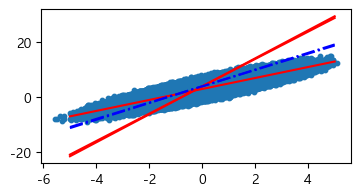

In [5]:
##  예) 몸무게, 나이 --> 고혈압
n_samples = 200
x1 = np.random.randn(n_samples)  
x2 = np.random.randn(n_samples) 

np.random.seed(7)  ## 7번 랜덤으로 초기화
y = 5 * x1 + 3 * x2 + 4 + np.random.randn(n_samples)
X = pd.DataFrame({'x1':x1, 'x2':x2})

#leg = LinearRegression()
#leg.fit(X, y)
leg = LinearRegression().fit(X, y)

print(leg.coef_)
print(leg.intercept_)

XX = np.linspace(-5, 5, 200)
plt.plot(XX, leg.coef_[0] * XX + leg.intercept_, "r-")
plt.plot(XX, leg.coef_[1] * XX + leg.intercept_, "b-.")

plt.show()

# 선형 회귀 (Linear Regression) 분석

**공식**  
\[
y = ax + b
\]

---

## 기본 개념
- **회귀(Regression)**: 두 변수 간 관계가 일반화된 선형 관계의 평균으로 돌아간다는 것을 의미
- **선형성(Linearity)**: 두 변수 간 관계가 직선 형태로 설명될 수 있는 것
- **최소제곱 추정량(Least Square Estimator)**: 실제 값과 예측 값의 차이(오차 제곱)의 합을 최소화하는 방식으로 회귀선을 구함

---

## 회귀분석의 특징
- 변수 간의 **함수적 관계** 탐색
- 독립변수(X)와 종속변수(Y)의 영향 분석
- 독립변수가 1 증가할 때 결과(Y)가 얼마나 달라지는지를 확인
- 선형 방정식의 해석력이 높고, 근사값을 찾는 데 유리
- **비선형 관계**도 적절한 변환(다항 회귀, 로그 변환 등)을 통해 예측 가능

---

## 해석
- 계수 a: 기울기, 독립변수가 종속변수에 미치는 영향의 크기
- 절편 b: 독립변수가 0일 때 종속변수의 값
